# Mukesh Jaikumar R.N
# 225229119
# PDL LAB 05


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
import re

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/motivational_vs_depression_quotes.csv")

In [ ]:
df

,quotes,label
0,Age is an issue of mind over matter. If you do...,1
1,"Anyone who stops learning is old, whether at t...",1
2,Wrinkles should merely indicate where smiles h...,1
3,True terror is to wake up one morning and disc...,1
4,A diplomat is a man who always remembers a wom...,1
...,...,...
554,Shakespeare himself never described this tortu...,0
555,I had stopped composing; my mind seemed to bec...,0
556,I did nothing.,0
557,One power was left to me-to suffer.,0


In [ ]:
df.isna().sum()

quotes    1
label     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df

,quotes,label
0,Age is an issue of mind over matter. If you do...,1
1,"Anyone who stops learning is old, whether at t...",1
2,Wrinkles should merely indicate where smiles h...,1
3,True terror is to wake up one morning and disc...,1
4,A diplomat is a man who always remembers a wom...,1
...,...,...
553,It is difficult to put into words what I suffe...,0
554,Shakespeare himself never described this tortu...,0
555,I had stopped composing; my mind seemed to bec...,0
556,I did nothing.,0


In [ ]:
df.shape

(558, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quotes  558 non-null    object
 1   label   558 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [ ]:
df['label'].value_counts()

1    280
0    278
Name: label, dtype: int64

In [ ]:
# downloading nltk dependencies
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

nltk.download('punkt')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
y = df['label']

y = y.to_numpy()

type(y)

numpy.ndarray

In [ ]:
all_stopwords = stopwords.words('english')
negation = ['no','not']

all_stopwords = [ w for w in all_stopwords if w not in negation]

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
def preprocessing(data):
  corpus = []
  for i in range(len(data)):
    review = data.iloc[i].lower()
    review = re.sub(r'\d+', ' ', review)
    review = review.split(' ')

    review = [lemma.lemmatize(word) for word in review if word not in all_stopwords ]
    review = ' '.join(review)
    corpus.append(review)
  return corpus



In [ ]:
review = preprocessing(df['quotes'])

In [ ]:
df['quotes']

0      Age is an issue of mind over matter. If you do...
1      Anyone who stops learning is old, whether at t...
2      Wrinkles should merely indicate where smiles h...
3      True terror is to wake up one morning and disc...
4      A diplomat is a man who always remembers a wom...
                             ...                        
553    It is difficult to put into words what I suffe...
554    Shakespeare himself never described this tortu...
555    I had stopped composing; my mind seemed to bec...
556                                       I did nothing.
557                  One power was left to me-to suffer.
Name: quotes, Length: 558, dtype: object

In [ ]:
review

['age issue mind matter. mind, matter.',
 'anyone stop learning old, whether twenty eighty. anyone keep learning stay young. greatest thing life keep mind young.',
 'wrinkle merely indicate smile been.',
 'true terror wake one morning discover high school class running country.',
 "diplomat man always remembers woman's birthday never remembers age.",
 'grow older, pay le attention men say. watch do.',
 'incessant great ill prolonged old age replete.',
 'old age, believe me, good pleasant thing. true gently shouldered stage, given comfortable front stall spectator.',
 'old age deformity enough own. never add deformity vice.',
 'nobody grows old merely living number years. grow old deserting ideals. year may wrinkle skin, give enthusiasm wrinkle soul.',
 'archaeologist best husband woman have. older get interested her.',
 'disease run one, old age.',
 'bashfulness ornament youth, reproach old age.',
 'like everyone else make mistake getting older, begin day coffee obituaries.',
 'age app

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(review).toarray()
X = X.astype(float)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
X.shape

(558, 2110)

In [ ]:
# train - test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,
                                                 random_state=42)

In [ ]:
# train - val split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


In [ ]:
X_train.shape,X_val.shape,X_test.shape

((334, 2110), (84, 2110), (140, 2110))

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [ ]:
INPUT_DIM = X.shape[1]
# NUMBER OF FEATURES

In [ ]:
model_1 = Sequential()
model_1.add(Dense(32,input_dim = INPUT_DIM,activation='relu'))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model_1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model1_history = model_1.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=100,batch_size=10)

Epoch 1/100
34/34 [==============================] - 6s 10ms/step - loss: 0.6909 - accuracy: 0.5629 - val_loss: 0.6842 - val_accuracy: 0.7024
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.9192 - val_loss: 0.6644 - val_accuracy: 0.7976
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.9820 - val_loss: 0.6283 - val_accuracy: 0.9048
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.9970 - val_loss: 0.5791 - val_accuracy: 0.9048
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 1.0000 - val_loss: 0.5291 - val_accuracy: 0.9048
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3414 - accuracy: 1.0000 - val_loss: 0.4818 - val_accuracy: 0.9048
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2646 - accuracy: 1.0000 - val_loss: 0.4415 - val_accuracy: 0.9048
Epoch 8/100


In [ ]:
print(max(model1_history.history['accuracy']))

1.0


In [ ]:
import matplotlib.pyplot as plt
def accuracy(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title(f"{model}  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


def loss_plot(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title(f"{model} Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


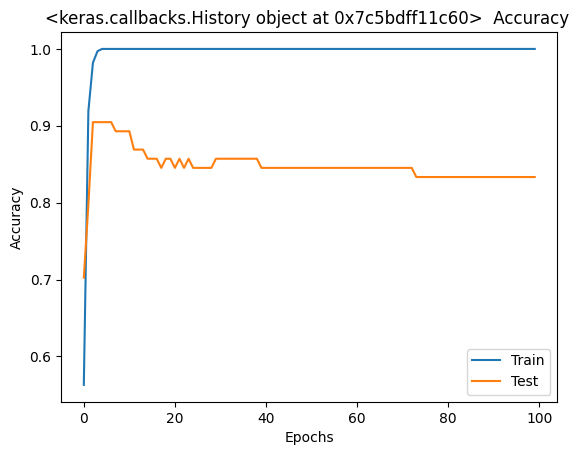

In [ ]:
accuracy(model1_history)

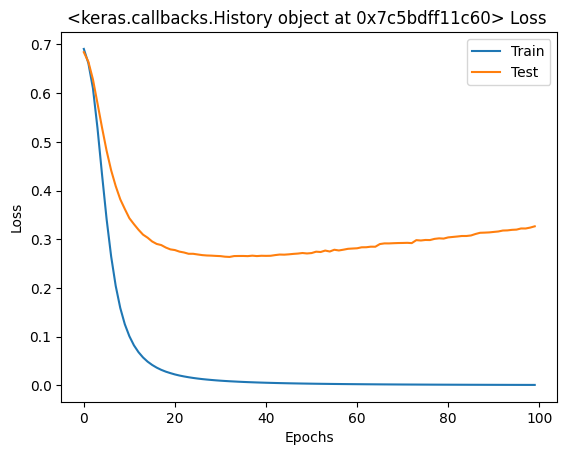

In [ ]:
loss_plot(model1_history)

# **Using Keras Tuner**

In [ ]:
! pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-37-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def model_building(hp):
  model_dnn = Sequential()
  model_dnn.add(Dense(units = hp.Int('units',
                                     min_value=32,
                                     max_value =1024,
                                     step =128),input_dim = INPUT_DIM,activation='relu'))
  model_dnn.add(Dense(1,activation = 'sigmoid'))
  model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_dnn

In [ ]:
! mkdir mydir

In [ ]:
tuner = RandomSearch(model_building,
                     objective = 'val_accuracy',
                     max_trials = 5,
                     executions_per_trial = 3,
                     directory = 'mydir',
                     project_name = 'dnn_model')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 128, 'sampling': 'linear'}


In [ ]:
tuner.search(X_train,y_train,epochs=5,
             validation_data = (X_val, y_val),
             callbacks=[keras.callbacks.TensorBoard("/content/mydir")])

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.8611111243565878

Best val_accuracy So Far: 0.9047618905703226
Total elapsed time: 00h 00m 35s


In [ ]:
tuner.results_summary()

Results summary
Results in mydir/dnn_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 288
Score: 0.9047618905703226

Trial 1 summary
Hyperparameters:
units: 416
Score: 0.8809523781140646

Trial 0 summary
Hyperparameters:
units: 544
Score: 0.8809523582458496

Trial 3 summary
Hyperparameters:
units: 672
Score: 0.8690476218859354

Trial 4 summary
Hyperparameters:
units: 160
Score: 0.8611111243565878


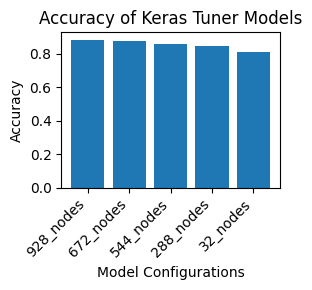

In [ ]:
import matplotlib.pyplot as plt


results = {'928_nodes': 0.8849206368128458, '672_nodes': 0.8769841194152832, '544_nodes': 0.8571428656578064,
           '288_nodes': 0.8452380895614624, '32_nodes':0.8134920597076416}


model_configs = list(results.keys())
accuracies = list(results.values())


plt.figure(figsize=(3, 3))
plt.bar(model_configs, accuracies)
plt.xlabel('Model Configurations')
plt.ylabel('Accuracy')
plt.title('Accuracy of Keras Tuner Models')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


### Configuration 2

In [ ]:
# Define the hyperparameters for the search space
num_layers = [2, 3, 4, 5]
num_nodes = 32

In [ ]:
! mkdir /content/hp_tuning/model2

mkdir: cannot create directory ‘/content/hp_tuning/model2’: No such file or directory


In [ ]:
! mkdir keras_tuner_results

In [ ]:
! mkdir keras_tuner_results/tuning

In [ ]:

def model_building(hp, input_dim, num_layers):
    model_dnn = Sequential()

    # Add the first hidden layer with input_dim
    model_dnn.add(Dense(units=hp.Int('units_0', min_value=32, max_value=1024, step=128),
                        input_dim=input_dim,
                        activation='relu'))

    # Add additional hidden layers based on num_layers
    for i in range(1, num_layers):
        model_dnn.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=1024, step=128),
                            activation='relu'))

    # Add the output layer with 1 unit and sigmoid activation
    model_dnn.add(Dense(1, activation='sigmoid'))

    model_dnn.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return model_dnn


In [ ]:
tuner2 = RandomSearch(model_building,
                     objective = 'val_accuracy',
                     max_trials = 5,
                     executions_per_trial = 3,
                     directory = 'mydir',
                     project_name = 'dnn_model')

In [ ]:
tuner2.search(X_train,y_train,epochs=5,
             validation_data = (X_val, y_val),
             callbacks=[keras.callbacks.TensorBoard("/content/mydir")])

In [ ]:
tuner2.results_summary()

Results summary
Results in mydir/dnn_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 288
Score: 0.9047618905703226

Trial 1 summary
Hyperparameters:
units: 416
Score: 0.8809523781140646

Trial 0 summary
Hyperparameters:
units: 544
Score: 0.8809523582458496

Trial 3 summary
Hyperparameters:
units: 672
Score: 0.8690476218859354

Trial 4 summary
Hyperparameters:
units: 160
Score: 0.8611111243565878
